In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/trip.csv')

In [3]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [6]:
data.duplicated().sum()

2

In [7]:
data[data['passenger_name'].isin(['Sarah Gross', 'Lisa Bullock'])]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [8]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22699 non-null  object 
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   payment_method         22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   fare_amount            22696 non-null  float64
 7   tip_amount             22699 non-null  float64
 8   tolls_amount           22699 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


In [9]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [10]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [11]:
data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [12]:
data.dropna(inplace=True)

In [13]:
data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

In [14]:
data.sort_values(['passenger_count'])

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
12804,Clayton Adams,09/22/2017 6:49:25 AM,09/22/2017 7:01:57 AM,Credit Card,0,2.90,11.5,2.45,0.0
19458,Julia Bell,10/27/2017 2:11:07 PM,10/27/2017 2:32:17 PM,Debit Card,0,2.70,14.5,2.50,0.0
5565,Charles Stewart,09/04/2017 5:40:00 PM,09/04/2017 5:51:52 PM,Cash,0,1.30,9.0,1.95,0.0
5670,Susan Cook,12/16/2017 7:50:12 PM,12/16/2017 8:00:30 PM,Cash,0,1.00,8.0,1.50,0.0
13718,Alexis Martinez,10/22/2017 5:55:51 PM,10/22/2017 5:58:34 PM,Cash,0,0.60,4.0,0.72,0.0
...,...,...,...,...,...,...,...,...,...
416,Melanie Wu,02/18/2017 12:44:04 PM,02/18/2017 1:29:10 PM,Debit Card,6,25.69,69.5,14.06,0.0
4322,Laura Myers,11/27/2017 7:29:13 AM,11/27/2017 7:59:16 AM,Debit Card,6,6.12,25.0,2.00,0.0
14500,Gabriel Henry,04/11/2017 8:18:14 PM,04/11/2017 8:25:33 PM,Credit Card,6,1.55,7.5,1.00,0.0
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0


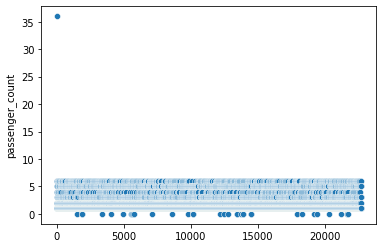

In [15]:
sns.scatterplot(x = data.index, y = data['passenger_count'])
plt.show()

In [16]:
data = data[data['passenger_count'] <= 6]

In [17]:
len(data[data['passenger_count'] == 0])

33

In [18]:
data = data[data['passenger_count'] != 0]

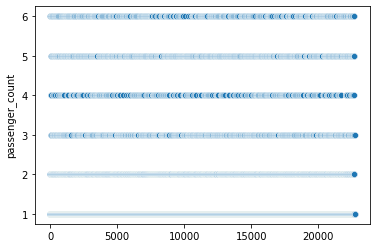

In [19]:
sns.scatterplot(x = data.index, y = data['passenger_count'])
plt.show()

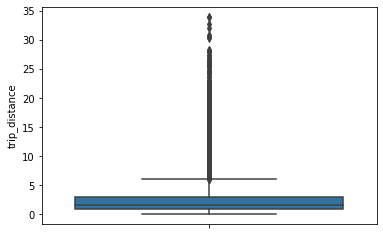

In [20]:
sns.boxplot(y=data.trip_distance)
plt.show()

In [21]:
data = data[data.trip_distance != 0]

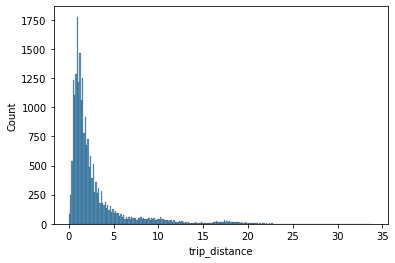

In [22]:
sns.histplot(data['trip_distance'])
plt.show()

In [23]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22515.000000,22515.000000,22515.000000,22515.000000,22515.000000
mean,1.645969,2.931924,12.958055,1.829513,0.309625
std,1.285783,3.657290,12.701799,2.767054,1.387300
min,1.000000,0.010000,-120.000000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.090000,14.500000,2.450000,0.000000
max,6.000000,33.960000,999.990000,200.000000,19.100000


In [24]:
len(data[data.fare_amount < 0])

13

In [25]:
data = data[data.fare_amount >= 0]

In [26]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
21844,Reginald Baker,04/18/2017 4:55:29 PM,04/18/2017 6:29:44 PM,Cash,2,20.40,0.00,0.00,12.50
19069,Glenn Garrett,07/10/2017 2:40:09 PM,07/10/2017 2:40:59 PM,Cash,1,0.10,0.00,0.00,0.00
4404,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.00,0.00,0.00
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
17236,Megan Walker,02/21/2017 10:19:02 PM,02/21/2017 10:19:50 PM,Debit Card,1,0.10,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


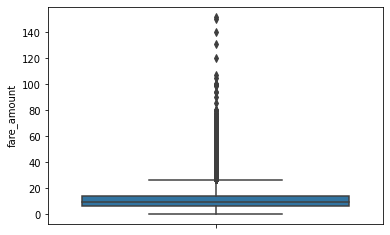

In [27]:
data = data[data.fare_amount < 200]

sns.boxplot(y = data.fare_amount)
plt.show()

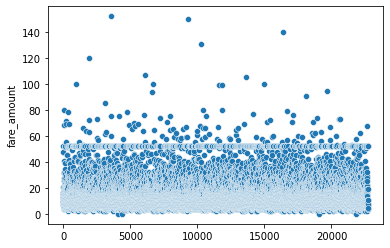

In [28]:
sns.scatterplot(x=data.index, y=data.fare_amount)
plt.show()

In [29]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [30]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4404,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.00,0.0,0.00
21844,Reginald Baker,04/18/2017 4:55:29 PM,04/18/2017 6:29:44 PM,Cash,2,20.40,0.00,0.0,12.50
19069,Glenn Garrett,07/10/2017 2:40:09 PM,07/10/2017 2:40:59 PM,Cash,1,0.10,0.00,0.0,0.00
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.0,10.50
19030,Jack Dunn,05/26/2017 1:37:58 AM,05/26/2017 1:38:11 AM,Credit Card,1,6.20,2.50,10.0,0.00
...,...,...,...,...,...,...,...,...,...
1930,Cameron Long,06/16/2017 6:30:08 PM,06/16/2017 7:18:50 PM,Debit Card,2,12.50,120.00,5.0,12.50
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.0,0.00
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.0,16.26
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,150.00,0.0,0.00


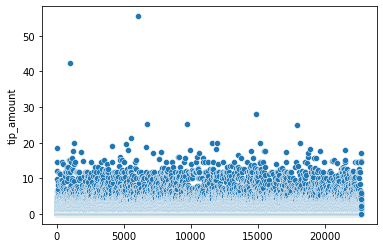

In [31]:
sns.scatterplot(x=data.index, y=data['tip_amount'])
plt.show()

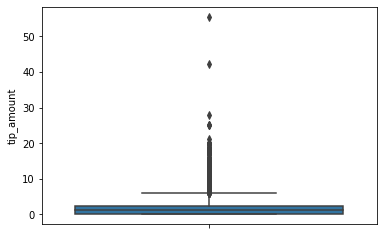

In [32]:
sns.boxplot(y=data['tip_amount'])
plt.show()

In [33]:
data['tip_amount'] = data['tip_amount'].apply(lambda x: 30 if x > 30 else x)
data.sort_values('tip_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
11357,Daniel Curtis,04/07/2017 1:17:13 PM,04/07/2017 1:24:54 PM,Cash,6,1.14,7.0,0.0,0.00
13007,Larry Espinoza,04/22/2017 12:32:35 PM,04/22/2017 12:40:09 PM,Cash,5,1.10,6.5,0.0,0.00
13009,Matthew Jacobs,05/10/2017 8:18:32 PM,05/10/2017 9:02:14 PM,Debit Card,1,17.90,52.0,0.0,5.76
13012,Maria Baker,08/07/2017 5:54:54 AM,08/07/2017 5:59:52 AM,Debit Card,1,1.10,6.0,0.0,0.00
6675,Ryan Steele,05/29/2017 3:12:17 PM,05/29/2017 3:19:41 PM,Cash,3,1.57,7.5,0.0,0.00
...,...,...,...,...,...,...,...,...,...
9716,Miss Karen Smith,09/28/2017 11:56:23 AM,09/28/2017 12:21:12 PM,Cash,1,10.02,30.0,25.2,5.76
6710,Nicholas Charles,10/30/2017 11:23:46 AM,10/30/2017 11:23:49 AM,Credit Card,1,0.32,100.0,25.2,0.00
14827,John Greer,11/28/2017 8:47:09 PM,11/28/2017 9:22:38 PM,Debit Card,1,20.90,57.5,28.0,2.64
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.0,30.0,16.26


In [34]:
len(data)

22500

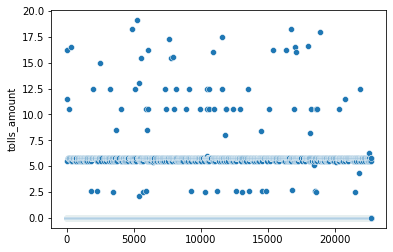

In [35]:
sns.scatterplot(x=data.index, y=data['tolls_amount'])
plt.show()

In [36]:
data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [37]:
data['payment_method'].value_counts()

Cash           11098
Debit Card      5730
Credit Card     5672
Name: payment_method, dtype: int64

In [38]:
data['payment_method'].replace({'Debit Card': 'Card', 'Credit Card': 'Card'}, inplace=True)

In [39]:
data['payment_method'].value_counts()

Card    11402
Cash    11098
Name: payment_method, dtype: int64

In [40]:
data['passenger_first_name'] = data.passenger_name.str.split().str[0]
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna


In [41]:
data.tpep_pickup_datetime = pd.to_datetime(data.tpep_pickup_datetime)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22500 non-null  object        
 1   tpep_pickup_datetime   22500 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22500 non-null  object        
 3   payment_method         22500 non-null  object        
 4   passenger_count        22500 non-null  int64         
 5   trip_distance          22500 non-null  float64       
 6   fare_amount            22500 non-null  float64       
 7   tip_amount             22500 non-null  float64       
 8   tolls_amount           22500 non-null  float64       
 9   passenger_first_name   22500 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.9+ MB


In [42]:
data.tpep_dropoff_datetime = pd.to_datetime(data.tpep_dropoff_datetime)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22500 non-null  object        
 1   tpep_pickup_datetime   22500 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22500 non-null  datetime64[ns]
 3   payment_method         22500 non-null  object        
 4   passenger_count        22500 non-null  int64         
 5   trip_distance          22500 non-null  float64       
 6   fare_amount            22500 non-null  float64       
 7   tip_amount             22500 non-null  float64       
 8   tolls_amount           22500 non-null  float64       
 9   passenger_first_name   22500 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 1.9+ MB


In [43]:
data['travel_time'] = data.tpep_dropoff_datetime - data.tpep_pickup_datetime 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22500 non-null  object         
 1   tpep_pickup_datetime   22500 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22500 non-null  datetime64[ns] 
 3   payment_method         22500 non-null  object         
 4   passenger_count        22500 non-null  int64          
 5   trip_distance          22500 non-null  float64        
 6   fare_amount            22500 non-null  float64        
 7   tip_amount             22500 non-null  float64        
 8   tolls_amount           22500 non-null  float64        
 9   passenger_first_name   22500 non-null  object         
 10  travel_time            22500 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 2.1+ MB


In [44]:
data['travel_time'] = (data.tpep_dropoff_datetime - data.tpep_pickup_datetime).dt.total_seconds()
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,844.0
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,1590.0
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,432.0
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,1815.0
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,1003.0


In [45]:
data['total_amount'] = data.fare_amount + data.tip_amount + data.tolls_amount

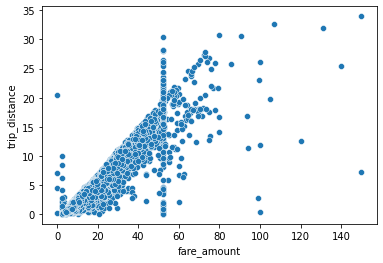

In [46]:
sns.scatterplot(x=data.fare_amount, y=data.trip_distance)
plt.show()

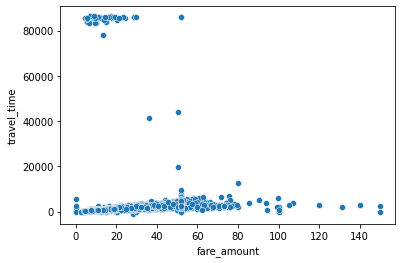

In [47]:
sns.scatterplot(x=data.fare_amount, y=data.travel_time)
plt.show()

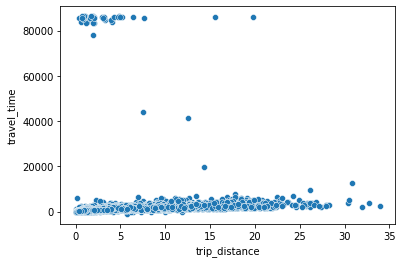

In [48]:
sns.scatterplot(x=data.trip_distance, y=data.travel_time)
plt.show()

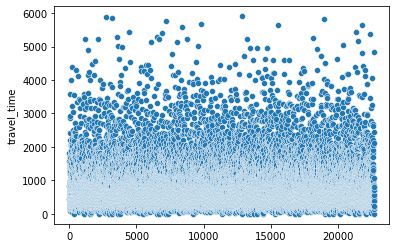

In [49]:
data = data[(data.travel_time < 6000) & (data.travel_time > 0)]
sns.scatterplot(x=data.index, y=data.travel_time)
plt.show()

In [2]:
import seaborn as sns

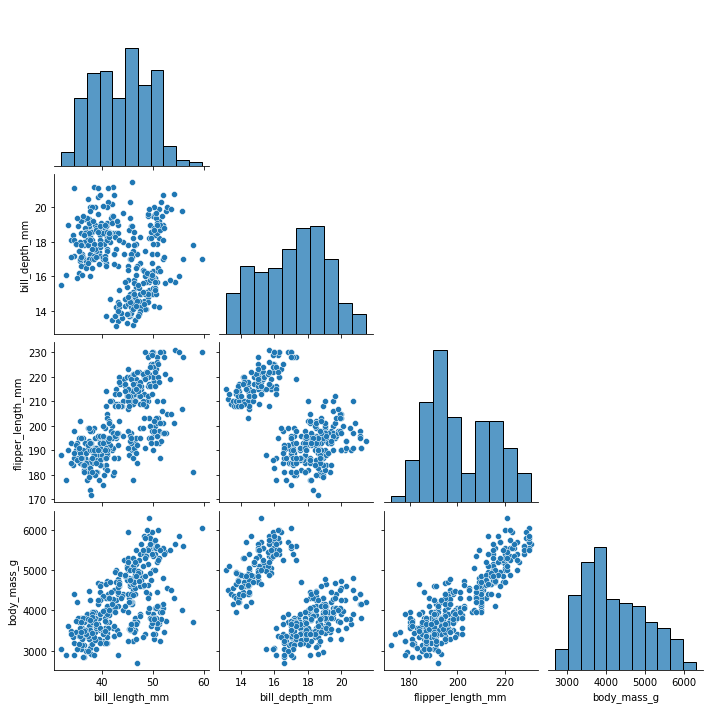

In [16]:
data = sns.load_dataset('penguins')
data_not_na = data.select_dtypes(include='number').dropna()
sns.pairplot(data_not_na, corner=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


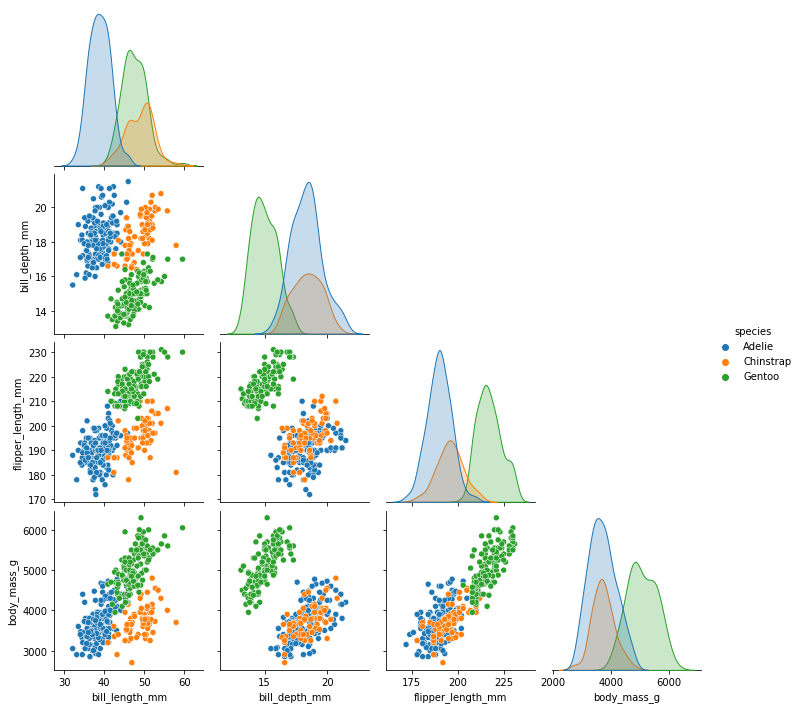

In [23]:
sns.pairplot(data, hue="species", diag_kind="kde", corner=True)

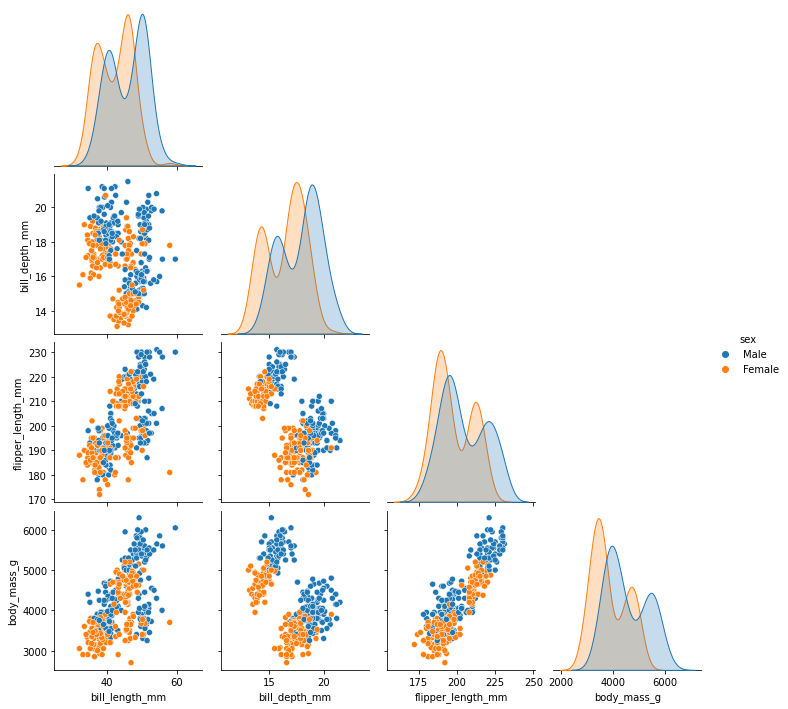

In [26]:
sns.pairplot(data, hue="sex", diag_kind="kde", corner=True)

In [28]:
import pandas as pd

In [36]:
data.groupby('species')['sex'].value_counts(normalize=True).unstack()

sex,Female,Male
species,,
Adelie,0.500000,0.500000
Chinstrap,0.500000,0.500000
Gentoo,0.487395,0.512605


In [41]:
pd.crosstab(data['species'], data['sex'], normalize='index')

sex,Female,Male
species,,
Adelie,0.500000,0.500000
Chinstrap,0.500000,0.500000
Gentoo,0.487395,0.512605
